## Observations and Insights
#### Add your analysis here
---

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [78]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [79]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [80]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_count_of_mice = merge_df["Mouse ID"].value_counts()
duplicate_count_of_mice

g989    13
b128    10
a444    10
c832    10
z578    10
        ..
v199     1
x336     1
b447     1
h428     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
removed_duplicates = merge_df.drop_duplicates(subset = "Mouse ID", keep = "first", inplace = False)
removed_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [83]:
# Check the number of mice in the clean DataFrame.
removed_duplicates_number_of_mice = removed_duplicates["Mouse ID"].count()
removed_duplicates_number_of_mice

249

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
mean = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 
median = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 
variance = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var() 
std_dev = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 
std_err = merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sumtable_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":std_dev, "Tumor Volume Std. Err.":std_err})
sumtable_df                     

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
sumtable = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
sumtable  

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

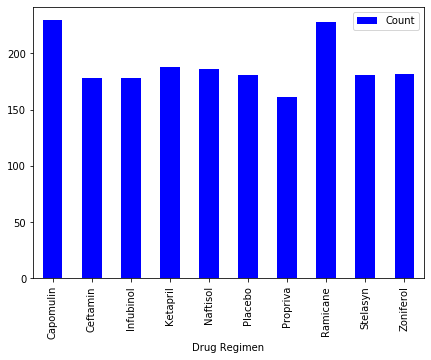

In [86]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
micenumber_df = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()
mice_per_drug = micenumber_df[["Drug Regimen", "Mouse ID"]]
mice_per_drug = mice_per_drug.rename (columns = {"Mouse ID":"Count"})
mice_per_drug = mice_per_drug.set_index("Drug Regimen")

mice_per_drug.plot(kind = "bar", figsize = (7,5), color = 'b')
plt.show()

In [87]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = sumtable_df.index.tolist()
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [88]:
mice_count = (merge_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

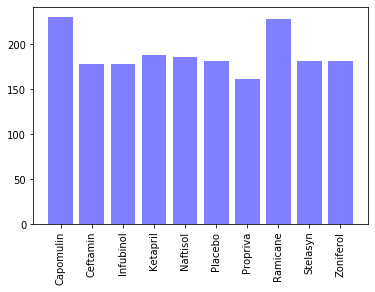

In [89]:
x_axis = np.arange(len(mice_count))
plt.bar(x_axis, mice_count, color = 'b', alpha = 0.5, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'])
plt.xticks(rotation = 90)
plt.show()

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame(merge_df.groupby(["Sex"]).count()).reset_index()
sex_df = sex_df[["Sex", "Mouse ID"]]
sex_df = sex_df.rename(columns = {"Mouse ID":"Count"})
sex_df.head()

,Sex,Count
0,Female,935
1,Male,958


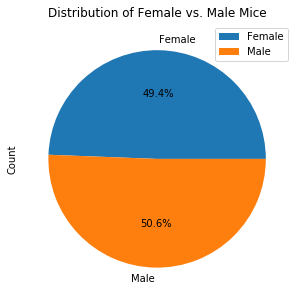

In [91]:
sex_df.plot(kind = "pie",figsize = (7,5), title = "Distribution of Female vs. Male Mice", y = "Count",autopct = '%1.1f%%', labels = sex_df["Sex"] )

Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

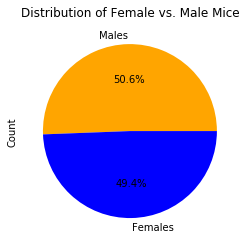

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distinctcount = merge_df["Sex"].value_counts().tolist()
#distinctcount
plt.pie(distinctcount, labels = ["Males", "Females"], colors = ["orange", "blue"], autopct = '%1.1f%%')
plt.ylabel("Count")
plt.title("Distribution of Female vs. Male Mice")

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = merge_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"])
last_timepoint_df = timepoint_df.loc[timepoint_df["Timepoint"] == 45]
last_timepoint_df.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [94]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset to tumor volume data list
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: unexpected EOF while parsing (<ipython-input-94-dc69f026c24b>, line 16)

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] =="Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_singlemouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
capomulin_singlemouse_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
196,371,l509,Capomulin,Male,17,21,0,45.000000,0
197,372,l509,Capomulin,Male,17,21,5,45.851193,0
198,373,l509,Capomulin,Male,17,21,10,46.759074,0
199,374,l509,Capomulin,Male,17,21,15,47.488599,1
200,375,l509,Capomulin,Male,17,21,20,48.070452,2
201,376,l509,Capomulin,Male,17,21,25,44.006257,2
202,377,l509,Capomulin,Male,17,21,30,44.708055,2
203,378,l509,Capomulin,Male,17,21,35,40.207289,2
204,379,l509,Capomulin,Male,17,21,40,40.770813,2
205,380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume')

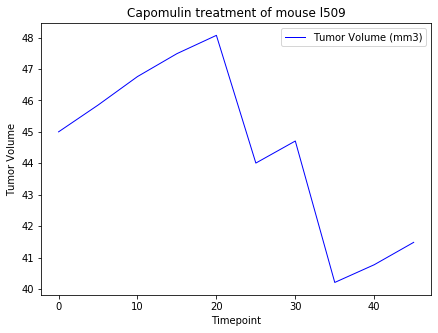

In [97]:
capomulin_singlemouse_df = capomulin_singlemouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_singlemouse_df = capomulin_singlemouse_df.reset_index(drop=True)
capomulin_singlemouse_df.set_index('Timepoint').plot(figsize=(7, 5), linewidth=1, color='b', title = "Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume")

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = capomulin_df.loc[:, ["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capolmulin_average_wvt = pd.DataFrame(scatter_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capolmulin_average_wvt = capolmulin_average_wvt.rename(columns = {"Tumor Volume (mm3)": "Average Volume"})
capolmulin_average_wvt.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


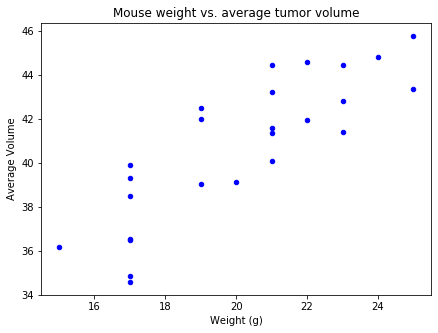

In [99]:
capolmulin_average_wvt.plot(kind = "scatter", figsize = (7, 5), color = 'b', title = "Mouse weight vs. average tumor volume", x="Weight (g)", y="Average Volume")

## Correlation and Regression

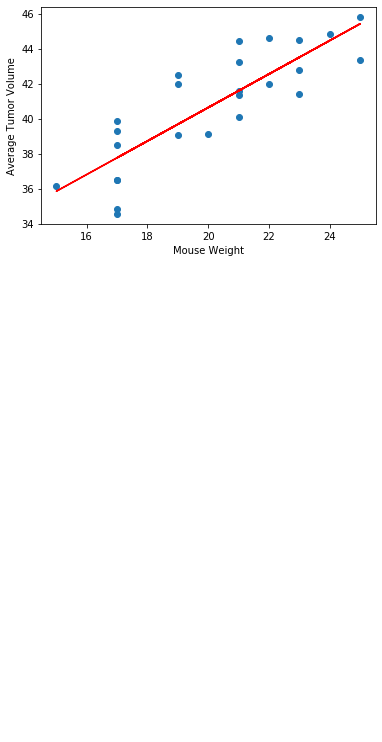

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capolmulin_average_wvt['Weight (g)']
y_values = capolmulin_average_wvt['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,5),color='r')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()